### Item 3

In [3]:
# Get Libraries
from API import SVD_Scratch
from API import PCA_Scratch
from API import TSNE_Scratch
import numpy as np
import importlib
import matplotlib.pyplot as plt
importlib.reload(SVD_Scratch)
importlib.reload(PCA_Scratch)
importlib.reload(TSNE_Scratch)

<module 'API.TSNE_Scratch' from 'd:\\AprendizajeDesarrollo\\EspecializacionAnalitica\\ML2\\API\\TSNE_Scratch.py'>

In [3]:
# Matrix to calculate SVD
A = np.array([[1, 2],[3, 4],[5, 6]])
#A = np.array([[2, 4],[1, 3],[0, 0],[0, 0]])
#A = np.array([[2, 4],[1, 3]])

In [4]:
U,S,Vt=SVD_Scratch.CalcularSVD(A)
print('Matrix U')
print(U)
print('Vactor S')
print(S)
print('Matrix VT')
print(Vt)

Matrix U
[[-0.2298477  -0.88346102  0.40824829]
 [-0.52474482 -0.24078249 -0.81649658]
 [-0.81964194  0.40189603  0.40824829]]
Vactor S
[9.52551809 0.51430058]
Matrix VT
[[ 0.61962948  0.78489445]
 [-0.78489445  0.61962948]]


In [7]:
Matrix_Rec=SVD_Scratch.reconstruc(U,S,Vt)
Matrix_Rec


array([[-1., -2.],
       [-3., -4.],
       [-5., -6.]])

When reconstructing the matrix, I get negative values, despite doing the operations well, it is observed that the U matrix has the values with some different signs when compared to the Numpy SVD.

In [8]:
# Get SVD descomposition using del Numpy function 
U, S, Vt = np.linalg.svd(A)
print('Matrix U')
print(U)
print('Matrix S')
print(S)
print('Matrix VT')
print(Vt)

Matrix U
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
Matrix S
[9.52551809 0.51430058]
Matrix VT
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [9]:
Matrix_Rec=SVD_Scratch.reconstruc(U,S,Vt)
Matrix_Rec


array([[1., 2.],
       [3., 4.],
       [5., 6.]])

### Item 4

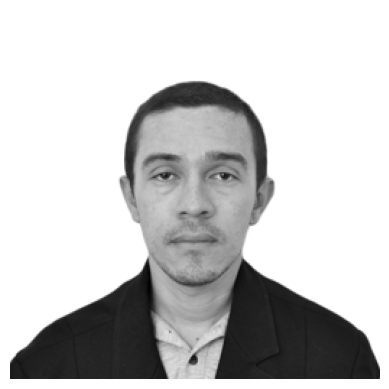

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

#Open the image
image_er=Image.open('Fotos/edwar_ramirez.jpg')

#Chage Size of image
new_size=(256,256)
resized_image = image_er.resize(new_size)

# Convert the resized image to grayscale
grayscale_image = resized_image.convert('L')

# Display the grayscale image using matplotlib
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

(256,)
(256, 256)
(256, 256)
mse error: 528.501776494872
rmse error: 22.989166502830678


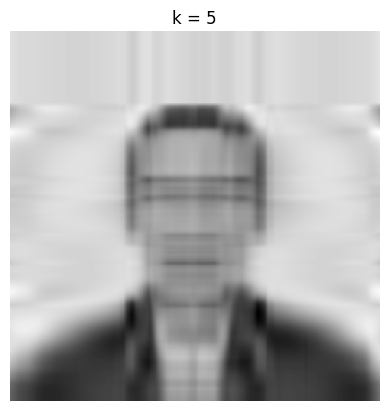

(256, 256)
mse error: 78.50404254065828
rmse error: 8.860250704165107


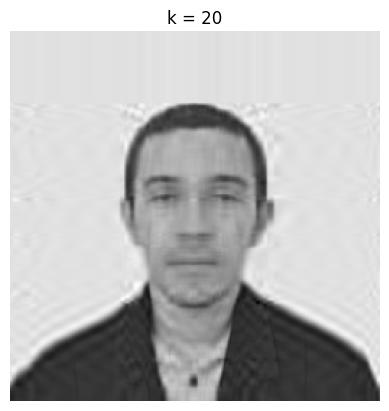

(256, 256)
mse error: 12.244779387167563
rmse error: 3.4992541186898047


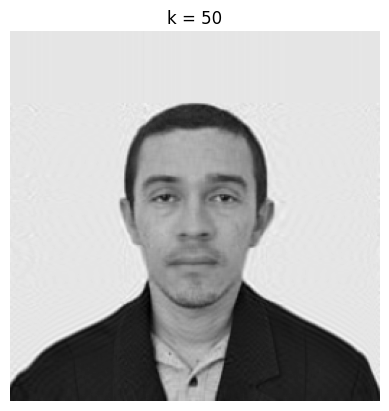

(256, 256)
mse error: 0.9583057285402652
rmse error: 0.9789309110147995


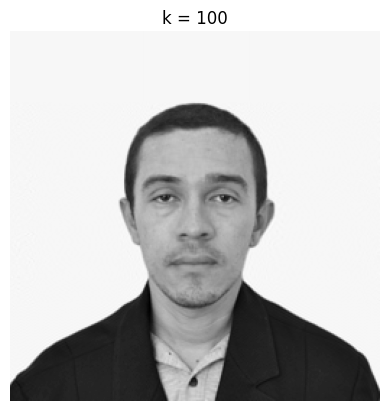

(256, 256)
mse error: 1.3292198651268056e-25
rmse error: 3.6458467673872493e-13


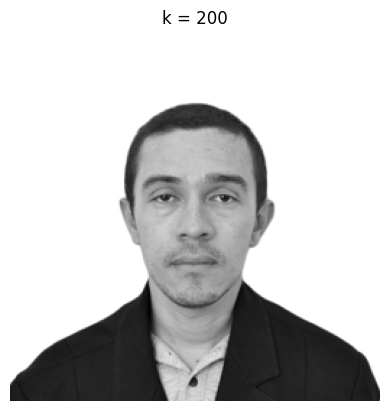

(256, 256)
mse error: 1.574724924781601e-25
rmse error: 3.968280389263845e-13


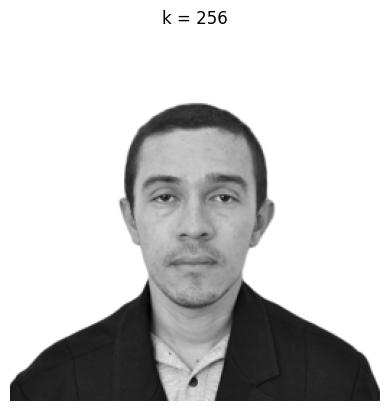

(256, 256)
mse error: 1.574724924781601e-25
rmse error: 3.968280389263845e-13


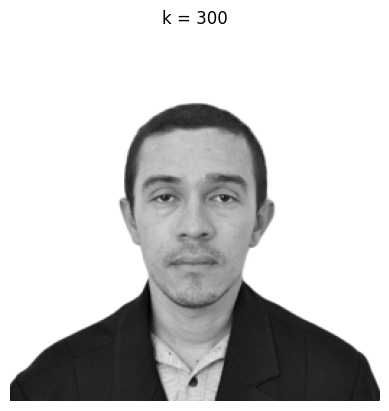

(256, 256)
mse error: 1.574724924781601e-25
rmse error: 3.968280389263845e-13


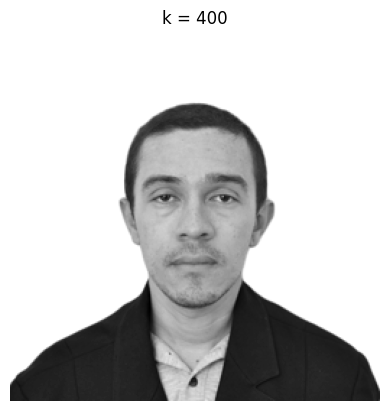

In [243]:
#Computing regular SVD
U, S, VT = np.linalg.svd(grayscale_image)

print(S.shape)

#Extract Diagonal Singular Values from the Sigma Matrix
S = np.diag(S)

print(S.shape)

i = 0
for k in (5, 20, 50, 100, 200, 256, 300, 400):
    #Constructing the approximate images in the setted ranks
    X_Ap = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
    print(X_Ap.shape)

    #Calculate de mse and rmse error between approximation and aoriginal photo
    mse_difference = np.mean((grayscale_image - X_Ap)**2)
    print('mse error:',mse_difference)
    rmse = sqrt(mse_difference)
    print('rmse error:',rmse)

    plt.figure(i+1)
    i += 1
    img = plt.imshow(X_Ap)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show()

The image can be reproduced from k=50. To calculate how different it is from the original image the error mse or rmse can be used. In the case of k=50 mse=12.24 and rmse=3.49. It is observed that values greater than 256 in K do not improve the error because the maximum number of components is 256.

### Item 5

I tried to import the mnist_784 dataset but I got error. Then, I worked with the dataset seen in class, load_digits

In [4]:
# Import Libraries
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#Load MNIST Data
mnist = load_digits(return_X_y=False)
mnist


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
# Get Y data
y = pd.DataFrame(mnist.target)
print(y)
print(y.shape)

      0
0     0
1     1
2     2
3     3
4     4
...  ..
1792  9
1793  0
1794  8
1795  9
1796  8

[1797 rows x 1 columns]
(1797, 1)


In [7]:
# Get X data
X = pd.DataFrame(mnist.data)
print(X)
print(X.shape)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

In [8]:
img=mnist.images[0]
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

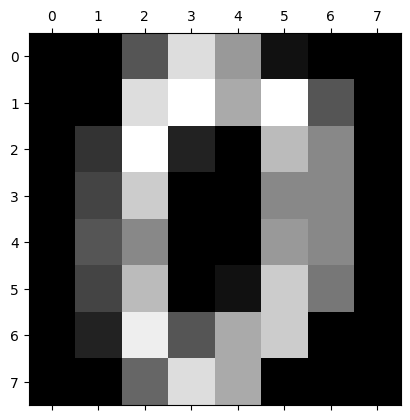

In [9]:
plt.gray()
plt.matshow(img)
plt.imsave(f'digit_0.png', img, cmap=plt.cm.gray)

In [13]:
image_0=Image.open('digit_0.png')
new_size=(8,8)
resized_image = image_0.resize(new_size)
gs_image_0 = resized_image.convert('L')
matrix_0= np.array(gs_image_0)
print(matrix_0.shape)
print(matrix_0)
vector = matrix_0.flatten()
print(vector)

(8, 8)
[[  0   0  85 221 153  17   0   0]
 [  0   0 221 255 170 255  85   0]
 [  0  51 255  34   0 187 136   0]
 [  0  68 204   0   0 136 136   0]
 [  0  85 136   0   0 153 136   0]
 [  0  68 187   0  17 204 119   0]
 [  0  34 238  85 170 204   0   0]
 [  0   0 102 221 170   0   0   0]]
[  0   0  85 221 153  17   0   0   0   0 221 255 170 255  85   0   0  51
 255  34   0 187 136   0   0  68 204   0   0 136 136   0   0  85 136   0
   0 153 136   0   0  68 187   0  17 204 119   0   0  34 238  85 170 204
   0   0   0   0 102 221 170   0   0   0]


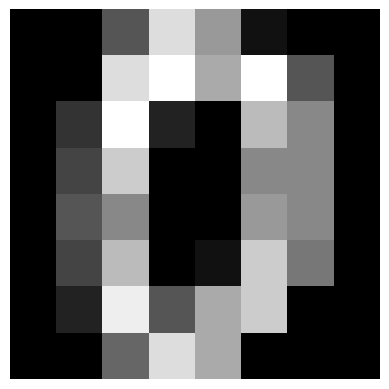

In [16]:
# Create an image from the matrix
image_reco = Image.fromarray(matrix_0)

# Display the grayscale image of average face using matplotlib
plt.imshow(image_reco)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

In [14]:
data_ima=X.loc[0]
data_ima

0      0.0
1      0.0
2      5.0
3     13.0
4      9.0
      ... 
59    13.0
60    10.0
61     0.0
62     0.0
63     0.0
Name: 0, Length: 64, dtype: float64

In [17]:
#Get where number are 0 and 8 in y
y_in= y[y[0].isin([0,8])]
X_in = X.iloc[y_in.index]
y_in.reset_index(inplace=True,drop=True)
X_in.reset_index(inplace=True,drop=True)
print(X_in.shape,y_in.shape)

(352, 64) (352, 1)


In [18]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_in, y_in, test_size=0.3, random_state=42)

In [19]:
print(y_train.squeeze().shape)
print(X_train.shape)

(246,)
(246, 64)


In [20]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

In [21]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred_tr=model.predict(X_train)

In [22]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy * 100:.2f}%")

# Evaluate the Model
accuracy = accuracy_score(y_train, y_pred_tr)
print(f"Accuracy train: {accuracy * 100:.2f}%")


Accuracy test: 100.00%
Accuracy train: 100.00%


The preformance in test and train is 100%. The model always hits the number 0 or 8.

### Item 6
Using SVD from Numpy

In [43]:
#Computing regular SVD
U_2, S_2, VT_2 = np.linalg.svd(X_in)

#Extract Diagonal Singular Values from the Sigma Matrix
S_2 = np.diag(S_2[:2])
k=2
X_Ap_2 = U_2[:,:k] @ S_2 @ VT_2[:k,:]

print('U',U_2[:,:k].shape,'S',S_2.shape,'VT',VT_2[:k,:].shape)
print(X_Ap_2.shape)

U (352, 2) S (2, 2) VT (2, 64)
(352, 64)


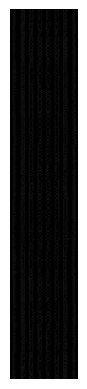

In [94]:
# Create an image from the matrix
OriginalData = Image.fromarray(np.array(X_in))

# Display the grayscale image of average face using matplotlib
plt.imshow(OriginalData)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

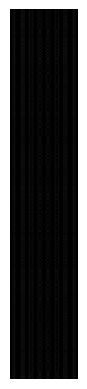

In [95]:
# Create an image from the matrix
ModifiedData = Image.fromarray(np.array(X_Ap_2))

# Display the grayscale image of average face using matplotlib
plt.imshow(ModifiedData)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

In [41]:
# Split Data into Training and Testing Sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_Ap_2, y_in, test_size=0.3, random_state=42)

# Train Logistic Regression Model
model4 = LogisticRegression(max_iter=1000, random_state=42)
model4.fit(X_train4, y_train4)

# Make Predictions
y_pred4= model4.predict(X_test4)

# Evaluate the Model
accuracy = accuracy_score(y_test4, y_pred4)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PCA from scratch

In [18]:
# create a PCA object with 2 components
pcaCal = PCA_Scratch.CalcularPCA(n_components=2)

In [19]:
# fit the data
pcaCal.fit(X_in)

# transform the data using the PCA object
X_transformed = pcaCal.transform(X_in)

print(X_transformed.shape)

(352, 2)


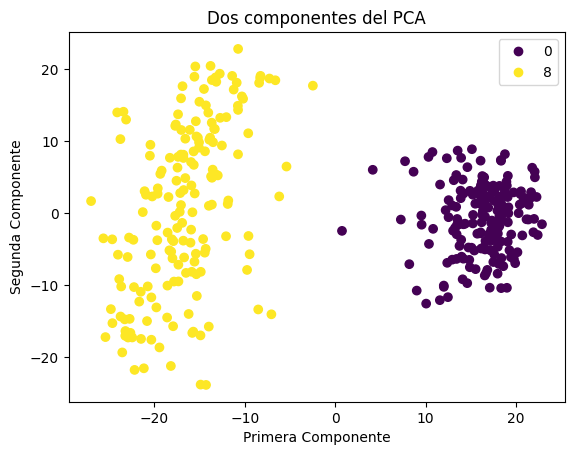

In [23]:
# Plot components
plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y_in)

plt.title('Dos componentes del PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.legend(handles=plot.legend_elements()[0], 
           labels=list(y_in[0]))

plt.show()

In [25]:
# Split Data into Training and Testing Sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_transformed, y_in, test_size=0.3, random_state=42)

# Train Logistic Regression Model
model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train1, y_train1)

# Make Predictions
y_pred1 = model2.predict(X_test1)

# Evaluate the Model
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


t-SNE from Scratch

In [31]:
from API import TSNE_Scratch
import importlib
importlib.reload(TSNE_Scratch)

<module 'API.TSNE_Scratch' from 'd:\\AprendizajeDesarrollo\\EspecializacionAnalitica\\ML2\\API\\TSNE_Scratch.py'>

In [36]:
X_inTSNE=np.array(X_in)
y_inTSNE=np.array(y_in)

In [38]:
PERPLEXITY = 20
SEED = 1                    # Random seed
MOMENTUM = 0.9
LEARNING_RATE = 10.
NUM_ITERS = 500             # Num iterations to train for
TSNE = True                # If False, Symmetric SNE
NUM_PLOTS = 5               # Num. times to plot in training


rng = np.random.RandomState(SEED)
# Obtain matrix of joint probabilities p_ij
P = TSNE_Scratch.p_joint(X_inTSNE, PERPLEXITY)

# Fit SNE or t-SNE
Y = TSNE_Scratch.estimate_sne(X_inTSNE, y_inTSNE, P, rng,
                    num_iters=NUM_ITERS,
                    q_fn=TSNE_Scratch.q_tsne if TSNE else q_joint,
                    grad_fn=TSNE_Scratch.tsne_grad if TSNE else symmetric_sne_grad,
                    learning_rate=LEARNING_RATE,
                    momentum=MOMENTUM,
                    plot=NUM_PLOTS)

In [40]:
# Split Data into Training and Testing Sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(Y, y_in, test_size=0.3, random_state=42)

# Train Logistic Regression Model
model5 = LogisticRegression(max_iter=1000, random_state=42)
model5.fit(X_train5, y_train5)

# Make Predictions
y_pred5= model5.predict(X_test5)

# Evaluate the Model
accuracy = accuracy_score(y_test5, y_pred5)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.06%


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


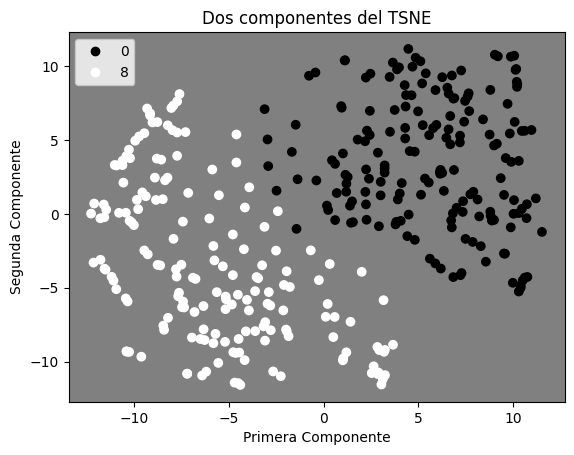

In [57]:
# Plot components
colors = ['red', 'green']
plot = plt.scatter(Y[:,0], Y[:,1], c=y_inTSNE)

plt.title('Dos componentes del TSNE') # Titulo de la gráfica
plt.xlabel('Primera Componente',) # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.legend(handles=plot.legend_elements()[0], 
           labels=list(y_in[0]))
plt.gca().set_facecolor('gray')



In [39]:
print(Y.shape)

(352, 2)


When dimensionality reduction is performed, data loss is expected and accuracy is expected to decrease. For this case it seems that with two components it is possible to adequately represent the original data in such a way that the accuracy for the logistic regression model remains at 100%.

### Item 7

#### PCA

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.manifold import TSNE # TSNE

In [50]:
pca_sl = PCA(iterated_power='auto', n_components = 2, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

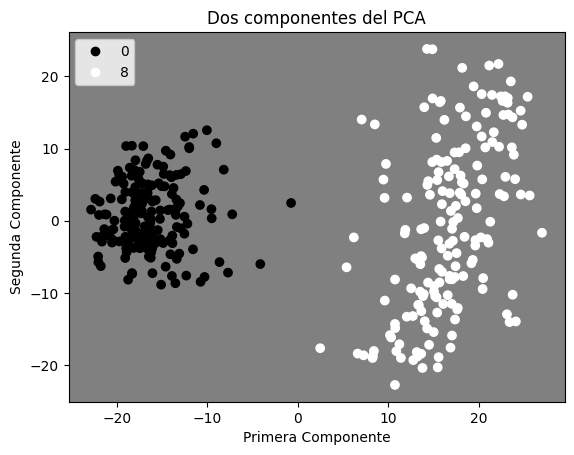

In [52]:
Variables_Principales = pca_sl.fit_transform(X_in) 

# Plot components
plot = plt.scatter(Variables_Principales[:,0], Variables_Principales[:,1], c=y_in)

plt.title('Dos componentes del PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.legend(handles=plot.legend_elements()[0], 
           labels=list(y_in[0]))
plt.gca().set_facecolor('gray')
plt.show()

In [31]:
# Split Data into Training and Testing Sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(Variables_Principales, y_in, test_size=0.3, random_state=42)

# Train Logistic Regression Model
model3 = LogisticRegression(max_iter=1000, random_state=42)
model3.fit(X_train3, y_train3)

# Make Predictions
y_pred3 = model3.predict(X_test3)

# Evaluate the Model
accuracy = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### t-SNE

In [53]:
tsne = TSNE(n_components = 2, learning_rate = 300, perplexity = 30, method = 'barnes_hut', 
            early_exaggeration = 12, init = 'random', random_state = 0)

In [54]:
Datos_Reducidos_TSNE = tsne.fit_transform(X_in) # Se puede demorar 20 a 30 minutos
print(X_in.shape) # Tamaño de los datos originales
print(Datos_Reducidos_TSNE.shape) # Tamaño de los datos reducidos

(352, 64)
(352, 2)


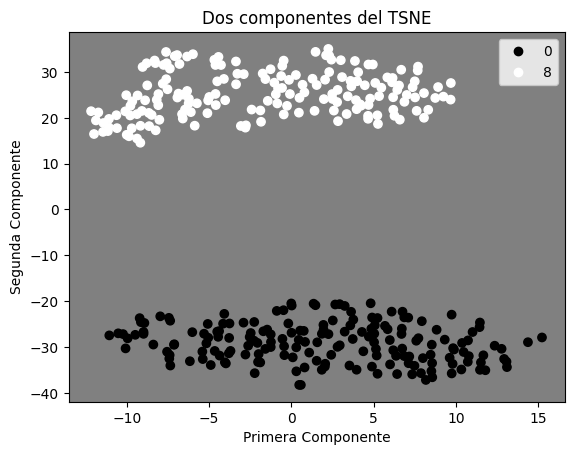

In [56]:
# Plot components
plot = plt.scatter(Datos_Reducidos_TSNE[:,0], Datos_Reducidos_TSNE[:,1], c=y_in)

plt.title('Dos componentes del TSNE') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.legend(handles=plot.legend_elements()[0], 
           labels=list(y_in[0]))
plt.gca().set_facecolor('gray')

Using the libraries available in Python to perform dimensionality reduction also yields 100% accuracy. Using these libraries can be expected to yield better results than implementations from scratch since they have more development and more robust numerical handling.

### Item 8

A Robust PCA takes the original matrix and factorizes it into the sum of two matrices. One matrix L containing a large amount of reuntant information and another sparse matrix S (Most records are zero) containing the corrupted or less reelevant data.

In [77]:
# Get Libraries
from API import PCAR_Scratch
from PIL import Image
import importlib
importlib.reload(PCAR_Scratch)

<module 'API.PCAR_Scratch' from 'd:\\AprendizajeDesarrollo\\EspecializacionAnalitica\\ML2\\API\\PCAR_Scratch.py'>

In [78]:
#Open the image
image_er=Image.open('Fotos/edwar_ramirez.jpg')

#Chage Size of image
new_size=(256,256)
resized_image = image_er.resize(new_size)

# Convert the resized image to grayscale
grayscale_image = resized_image.convert('L')

In [80]:
M=np.array(grayscale_image)
print(M.shape)


(256, 256)


In [81]:
L, S =  PCAR_Scratch.pcp(M, maxiter=5, k=10)

rank sv: 1
error:  0.23878490558041537
rank sv: 14
error:  0.01680625555168245
rank sv: 11
error:  0.0012085617488314584
rank sv: 24
error:  5.331934608593849e-05
rank sv: 21
error:  1.8454197869886142e-06


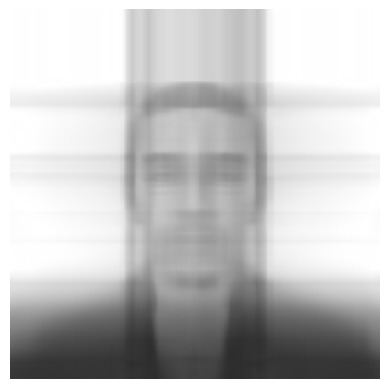

In [82]:
# Create an image from the matrix
L_Image = Image.fromarray(L)

# Display the grayscale image of average face using matplotlib
plt.imshow(L_Image)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

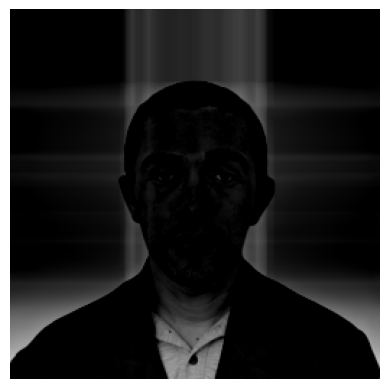

In [71]:
# Create an image from the matrix
S_Image = Image.fromarray(S)

# Display the grayscale image of average face using matplotlib
plt.imshow(S_Image)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

### Item 9 UMAP

##### The principal mathematical
The principal mathematical result behind UMAP is that there is an adjunction between finite fuzzy simplicial sets and finite extended-pseudo-metric spaces.

Finite fuzzy simplicial sets are mathematical objects that arise in the field of algebraic topology, particularly in the study of topological data analysis and persistent homology. They are used to represent and analyze data in a topological and geometric context.

A finite fuzzy simplicial set is a collection of simplices, which are basic geometric shapes, such as points, lines, triangles, and higher-dimensional analogs. In this context, "fuzzy" means that each simplex is associated with a degree of membership or a weight, which quantifies the extent to which it is included in the set.

Finite extended-pseudo-metric spaces, also known as finite E-pseudometric spaces, are mathematical structures used in the study of topological spaces and metric spaces. These spaces generalize the concept of metric spaces by relaxing some of the axioms of a true metric space.

In a finite extended-pseudo-metric space, you have a set of points (or elements), and a function that assigns non-negative real numbers (or sometimes positive infinity) to pairs of points. This function, often denoted as d, satisfies the following properties:

- Non-negativity: d(x, y) ≥ 0 for all x, y in the space.
- Identity of indiscernibles: d(x, y) = 0 if and only if x = y.
- Symmetry: d(x, y) = d(y, x) for all x, y in the space.
- Triangle inequality (relaxed): d(x, z) ≤ d(x, y) + d(y, z) for all x, y, z in the space.

##### What is it useful for?
UMAP is a fairly flexible non-linear dimension reduction algorithm. It seeks to learn the manifold structure of your data and find a low dimensional embedding that preserves the essential topological structure of that manifold.

Works very similarly to t-SNE - both use graph layout algorithms to arrange data in low-dimensional space. In the simplest sense, UMAP constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible.


### Item 10 LDA

##### The principal mathematical
The idea is maximize the distance between the means of one or several groups and minimize the variance within the individual group of data.

LDA focuses primarily on projecting the features in higher dimension space to lower dimensions. You can achieve this in three steps:

- Firstly, you need to calculate the separability between classes which is the distance between the mean of different classes. This is called the between-class variance.

![Step 1](Step1.PNG)

- Secondly, calculate the distance between the mean and sample of each class. It is also called the within-class variance.

![Step 2](Step2.PNG)

- Finally, construct the lower-dimensional space which maximizes the between-class variance and minimizes the within-class variance. P is considered as the lower-dimensional space projection, also called Fisher’s criterion.

![Step 3](Step3.PNG)

Each variable in the data is shaped in the form of a bell curve when plotted,i.e. Gaussian.
The values of each variable vary around the mean by the same amount on the average,i.e. each attribute has the same variance.

##### What is it useful for?
LDA is mainly used in classification problems where you have a categorical output variable. It allows both binary classification and multi-class classification.

The standard LDA model makes use of the Gaussian Distribution of the input variables. You should check the univariate distributions of each attribute and transform them into a more Gaussian-looking distribution. For example, for the exponential distribution, use log and root function and for skewed distributions use BoxCox.

The assumptions made by an LDA model about your data:

- Each variable in the data is shaped in the form of a bell curve when plotted,i.e. Gaussian.
- The values of each variable vary around the mean by the same amount on the average,i.e. each attribute has the same variance.


### Item 11

 The model is trained using MNIST_Digits_Classification.py file  to classify the images of the load_digits dataset with an SGDClassifier, obtaining an accuracy of 95%. This model is stored in mnist_classification_model.plk and then loaded from the API.

The API loads the model and in the server the image is requested to the user. Then transforms it to an 8 x 8 matrix, transforms to grayscale and ventorizes the matrix to deliver it to the classifier.

The API was deployed but ir returned a error "{"detail":"Method Not Allowed"}" and the message  127.0.0.1:55233 - "GET / HTTP/1.1" 404 Not Found was displayed on the screen.